### Podatkovno rudarjenje, 1. domača naloga, 9. 3. 2018

# Priprava podatkov, osnovne statistike in vizualizacija

**Ime: Žan Žagar Vpisna_Številka: 63160340 **

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in prikaz
osnovnih statistik.

### Oddaja
Zapišite kodo in odgovore v spodnje celice. Tako pripravljen notebook shranite v vaš repozitorij za domače naloge na *github*. V učilnici oddajte le povezavo do notebooka v vašem repozitoriju, n.pr.: https://github.com/vašeuporabniškoime/PR18DNvz/dn1/poročilo.ipynb.

Za bolj podrobna navodila, glejte razdelek "Domače naloge" v [spletni učilnici predmeta](https://ucilnica.fri.uni-lj.si/course/view.php?id=37).

## Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**. Podatke naložite iz [spletne učilnice](https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=19230).

Iste podatke boste uporabili v vseh domačih nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5.  
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

In [93]:
# tu zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov,
# ki jih boste uporabi pri odgovarjanju na spodnja vprašanja
% matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from Orange.data.filter import SameValue
from Orange.data import Table
import numpy as np
from csv import DictReader

ratings = DictReader(open('ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
tags = DictReader(open('ml-latest-small/tags.csv', 'rt', encoding='utf-8'))
movies = DictReader(open('ml-latest-small/movies.csv', 'rt', encoding='utf-8'))
cast = DictReader(open('ml-latest-small/cast.csv', 'rt', encoding='utf-8'))
links = DictReader(open('ml-latest-small/links.csv', 'rt', encoding='utf-8'))
movies_orange = Table("ml-latest-small/movies.csv")
ratings_orange = Table("ml-latest-small/ratings.csv")


In [19]:
print(movies_orange.domain)
print(ratings_orange.domain)

[movieId] {title, genres}
[userId, movieId, rating, timestamp]


## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

In [ ]:
# kodo lahko razdelite v več celic
# Putting movie titles and their average rating into a data structure
average_movie_ratings = []
for element in movies_orange:
    # print(element["movieId"])
    ratings_with_id_of_this_movie_filt = SameValue(ratings_orange.domain['movieId'], element["movieId"])
    ratings_of_this_movie_subset = ratings_with_id_of_this_movie_filt(ratings_orange)
    movie_title = str(element["title"])
    rating_sum = 0
    rating_count = 0
    for rating in ratings_of_this_movie_subset:
        rating_sum += float(rating[2]) # domain index of rating is 2
        rating_count += 1
    avg_rating = str(rating_sum / rating_count)
    average_movie_ratings.append([movie_title,rating_count,avg_rating])
    # print(average_movie_ratings)
 

In [43]:
# Sorting data structure from highest to lowest rating
average_movie_ratings_sorted = sorted(average_movie_ratings, key=lambda movie: movie[2], reverse=True)
#print(average_movie_ratings_sorted)

In [50]:
# Top 10 ocenjenih filmov
count = 1
for movie in average_movie_ratings_sorted:
    if count == 11:
        break
    print(str(count)+". Movie is "+ str(movie[0]) + " with a rating of " + str(movie[2])+ " and "+ str(movie[1])+ " votes.")
    count += 1

1. Movie is Lamerica (1994) with a rating of 5.0 and 1 votes.
2. Movie is Mute Witness (1994) with a rating of 5.0 and 1 votes.
3. Movie is Picture Bride (Bijo photo) (1994) with a rating of 5.0 and 1 votes.
4. Movie is Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994) with a rating of 5.0 and 3 votes.
5. Movie is Paris, France (1993) with a rating of 5.0 and 1 votes.
6. Movie is Faces (1968) with a rating of 5.0 and 1 votes.
7. Movie is Maya Lin: A Strong Clear Vision (1994) with a rating of 5.0 and 2 votes.
8. Movie is Heavy (1995) with a rating of 5.0 and 1 votes.
9. Movie is Death in the Garden (Mort en ce jardin, La) (1956) with a rating of 5.0 and 1 votes.
10. Movie is Day the Sun Turned Cold, The (Tianguo niezi) (1994) with a rating of 5.0 and 1 votes.


Odgovor: **Opazim da je težava pri filmih z nizkim številom ratingov, kajti ti imajo ogromno težo na povprečen rating filma **

**Najbolj enostavna rešitev, in ta ki mi sprva pade na pamet je da bi preprosto upošteval samo filme z rating countom > neka relativno velika cifra **

In [57]:
# Implementacija zgornje rešitve
count = 1
for movie in average_movie_ratings_sorted:
    if count == 11:
        break
    if movie[1] > 50:

 # Samo filmi z več kot 50 ratingov
        print(str(count)+". Movie is "+ str(movie[0]) + " with a rating of " + str(movie[2])+ " and "+ str(movie[1])+ " votes.")
        count += 1

1. Movie is Godfather, The (1972) with a rating of 4.4875 and 200 votes.
2. Movie is Shawshank Redemption, The (1994) with a rating of 4.487138263665595 and 311 votes.
3. Movie is Maltese Falcon, The (1941) with a rating of 4.387096774193548 and 62 votes.
4. Movie is Godfather: Part II, The (1974) with a rating of 4.385185185185185 and 135 votes.
5. Movie is Usual Suspects, The (1995) with a rating of 4.370646766169155 and 201 votes.
6. Movie is Chinatown (1974) with a rating of 4.3355263157894735 and 76 votes.
7. Movie is Rear Window (1954) with a rating of 4.315217391304348 and 92 votes.
8. Movie is 12 Angry Men (1957) with a rating of 4.304054054054054 and 74 votes.
9. Movie is Schindler's List (1993) with a rating of 4.30327868852459 and 244 votes.
10. Movie is Seven Samurai (Shichinin no samurai) (1954) with a rating of 4.277777777777778 and 54 votes.


** Sedaj vidim da so rezultati bolj realni in pravilni (filmi za katere sem že slišal v top 10), ki imajo tudi veliko ogledov **

### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

In [ ]:
# kodo lahko razdelite v več celic
# Koda doda vsak obstoječ žanr v seznam žanrov
all_genres_list=[]
for movie in movies_orange:
    genres_list = str(movie["genres"]).split("|")
    for genre in genres_list:
        if (genre not in all_genres_list):
            all_genres_list.append(genre)

In [76]:
print(all_genres_list)
print("")
print("The number of genres is "+str(len(all_genres_list)))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'Documentary', 'IMAX', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']

The number of all genres is 20


Odgovor: **Število žanrov je 20** (vključuje opcijo da je film brez žanra kot svoj žanr)

In [90]:
# Naredil sem seznam od prej in slovar z vrednosti ponovitev ter število vseh žanrov
all_genres_list=[]
all_genres_count_hash ={}
total_genre_count = 0
for movie in movies_orange:
    genres_list = str(movie["genres"]).split("|")
    for genre in genres_list:
        if (genre not in all_genres_list):
            all_genres_list.append(genre)
        if (genre in all_genres_count_hash):
            all_genres_count_hash[genre] += 1
        else:
            all_genres_count_hash[genre] = 1
        total_genre_count += 1
        

In [142]:
# Pripravljam podatke
#np.matrix()
genre_frequency_list = []

for genre,frequency in all_genres_count_hash.items():
    relative_frequency = frequency/total_genre_count
    genre_frequency_list.append([genre,relative_frequency])
#print(genre_frequency_list)
genre_frequency_matrix = genre_frequency_list
print(genre_frequency_matrix)

[['Adventure', 0.054916420845624384], ['Animation', 0.021976401179941003], ['Children', 0.028662733529990166], ['Comedy', 0.16297935103244837], ['Fantasy', 0.03215339233038348], ['Romance', 0.07595870206489676], ['Drama', 0.21460176991150443], ['Action', 0.07595870206489676], ['Crime', 0.05408062930186824], ['Thriller', 0.08500491642084562], ['Horror', 0.04311701081612586], ['Mystery', 0.026696165191740413], ['Sci-Fi', 0.03893805309734513], ['Documentary', 0.024336283185840708], ['IMAX', 0.00752212389380531], ['War', 0.018043264503441493], ['Musical', 0.019370698131760077], ['Western', 0.008259587020648967], ['Film-Noir', 0.006538839724680432], ['(no genres listed)', 0.0008849557522123894]]


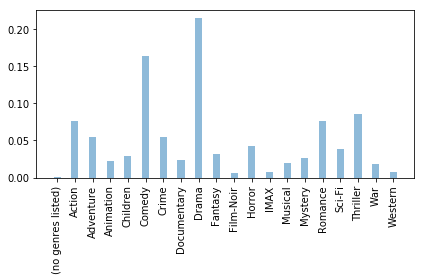

In [165]:

#print(genre_frequency_matrix[:, 0])
#ylabel = np.linspace(0, 1, 10)
frequencies = []
titles = []
for element,value in genre_frequency_matrix:
    frequencies.append(value)
    titles.append(element)
plt.figure()
xlen= range(len(titles))
ylabel = frequencies
#plt.set_ylabel("Frekvenčna porazdelitev")
plt.bar(titles,ylabel,align="center", width=0.4, alpha=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
#plt.set_title("Frekvenca žanrov")




Odgovor: **Frekvenčna porazdelitev žanrov, vidimo da je največ dram**

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

In [5]:
# kodo lahko razdelite v več celic

Odgovor: **zapišite odgovor**

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

In [6]:
# kodo lahko razdelite v več celic

Odgovor: **zapišite odgovor**

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

In [7]:
# kodo lahko razdelite v več celic

Odgovor: **zapišite odgovor**

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **zapišite odgovor**

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [8]:
from csv import DictReader

reader = DictReader(open('ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [9]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [10]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'